# Healthcare Lab (Advanced Data Transformation)

**Learning Objectives:**
  * Practice advanced data transformations over large datasets
  
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [2]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [10]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [5]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [6]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

## 3. We need to develop a visual representation of the evolution of ER Visits accross time and counties.
### We decide to use heatmap plots: https://seaborn.pydata.org/generated/seaborn.heatmap.html
### Heatmap plots require the data in Wide Format

### 3.1. We select ER Visits

In [17]:
ERVisitsFilter=HealthCareDataSet['TypeFlag']=='ER'

In [36]:
HealthCareDataSet[ERVisitsFilter].head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


### 3.2 We compute the total number of ERVisits per hospital per month

In [38]:
HealthCareDataSetFilteredGrouped=HealthCareDataSet[ERVisitsFilter][['County','StartDate','Id']].groupby(['County',pd.Grouper(key='StartDate',freq='90D')]).count()
HealthCareDataSetFilteredGrouped

Id
County   StartDate       
02af982d 2020-01-01  2808
         2020-03-31  2088
         2020-06-29  2139
         2020-09-27  2173
         2020-12-26   100
...                   ...
fd218584 2020-01-01   883
         2020-03-31   475
         2020-06-29   597
         2020-09-27   522
         2020-12-26    22

[71 rows x 1 columns]

### 3.3. We pivot the DataFrame to transform it into wide format

In [48]:
HealthCareDataSetFilteredGrouped.reset_index().pivot(index='StartDate',columns='County',values='Id')

County,02af982d,217dc01f,33b7d74d,39825de7,425a37b2,5597ffc0,6f0b5b6c,6f943458,7a56b047,7d9b432e,89e38653,adb3fb00,b021dd12,b60a20c4,bd284e56,e6708950,ea48569b,fc471384,fd218584
StartDate,,,,,,,,,,,,,,,,,,,
2020-01-01,2808.0,NaN,1.0,18.0,1508.0,112.0,25.0,178.0,NaN,206.0,724.0,32.0,480.0,11.0,NaN,258.0,558.0,110.0,883.0
2020-03-31,2088.0,2.0,NaN,NaN,1110.0,39.0,13.0,251.0,NaN,61.0,499.0,29.0,239.0,NaN,NaN,66.0,18.0,53.0,475.0
2020-06-29,2139.0,9.0,NaN,NaN,1183.0,138.0,75.0,217.0,NaN,50.0,346.0,86.0,194.0,NaN,NaN,114.0,103.0,41.0,597.0
2020-09-27,2173.0,34.0,NaN,68.0,1323.0,55.0,74.0,89.0,7.0,33.0,459.0,26.0,323.0,NaN,15.0,275.0,NaN,15.0,522.0
2020-12-26,100.0,NaN,NaN,5.0,90.0,NaN,23.0,1.0,NaN,NaN,29.0,NaN,31.0,NaN,NaN,21.0,5.0,13.0,22.0


### 3.4. We produce the visualization

<Axes: xlabel='County', ylabel='StartDate'>

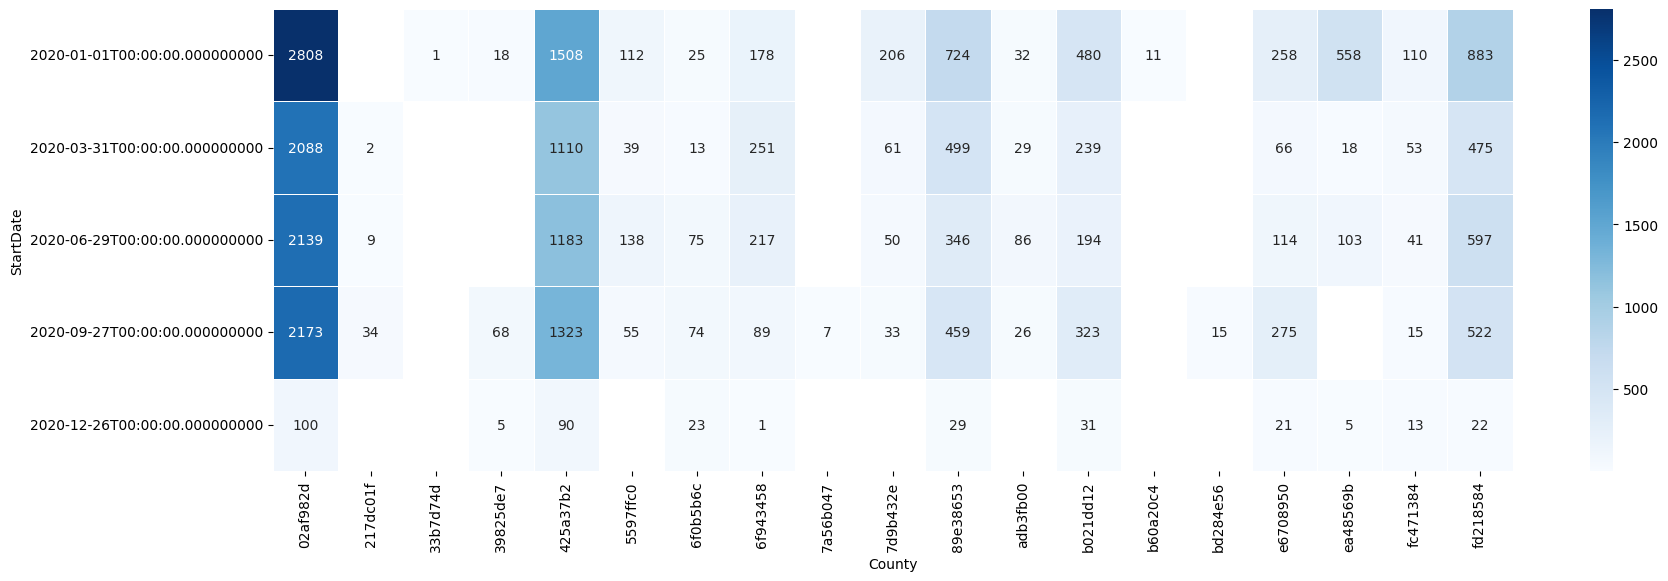

In [49]:
f, ax = plt.subplots(figsize=(20, 6))

sns.heatmap(HealthCareDataSetFilteredGrouped.reset_index().pivot(index='StartDate',columns='County',values='Id'), annot=True,  linewidths=.5 ,cmap='Blues', fmt='g')

## 4. We need to develop a table summarizing medical events per hospital
### This kind of transformations are usually required to train AI systems


In [51]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


### 4.1. First we aggregate and count number of medical events based on `PrincipalDiagnosis`

In [62]:
HealthCareDataSetGrouped=HealthCareDataSet.groupby(['County','PrincipalDiagnosis']).count().reset_index()
HealthCareDataSetGrouped

,County,PrincipalDiagnosis,Id,MemberName,MemberID,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,02af982d,A04.72,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
1,02af982d,A08.4,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
2,02af982d,A09,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
3,02af982d,A40.9,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
4,02af982d,A41.51,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,fd218584,T85.71XA,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
1849,fd218584,T86.22,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
1850,fd218584,U07.1,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
1851,fd218584,Z00.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### 4.2. We pivot the previous DataFrame to transform it as expected

In [63]:
HealthCareDataSetGrouped.pivot(index='PrincipalDiagnosis',columns='County',values='Id')




County,02af982d,217dc01f,33b7d74d,39825de7,425a37b2,5597ffc0,6f0b5b6c,6f943458,7a56b047,7d9b432e,89e38653,adb3fb00,b021dd12,b60a20c4,bd284e56,e6708950,ea48569b,fc471384,fd218584
PrincipalDiagnosis,,,,,,,,,,,,,,,,,,,
A02.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0
A04.72,36.0,NaN,NaN,NaN,14.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A08.4,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
A09,17.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN
A40.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z85.038,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z86.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z86.73,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
